In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your_API_Key")
project = rf.workspace("dronebased-inspection").project("wind-farms-d7smk")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wind-Farms-1 in yolov8:: 100%|██████████| 2528/2528 [00:00<00:00, 8687.91it/s]


In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 25.7 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(data="/content/Wind-Farms-1/data.yaml", epochs=50, imgsz=640)


Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Wind-Farms-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 98.9MB/s]


AMP: checks passed ✅


train: Scanning /content/Wind-Farms-1/train/labels... 881 images, 5 backgrounds, 0 corrupt: 100%|██████████| 881/881 [00:00<00:00, 2296.96it/s]

train: New cache created: /content/Wind-Farms-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Wind-Farms-1/valid/labels... 247 images, 1 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 1473.58it/s]

val: New cache created: /content/Wind-Farms-1/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.42G      2.133      2.331      1.728         24        640: 100%|██████████| 56/56 [00:19<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        247       1562      0.939     0.0748      0.152     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.28G      1.751      1.543      1.424         23        640: 100%|██████████| 56/56 [00:16<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]


                   all        247       1562      0.243      0.437      0.276       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.24G      1.697      1.394      1.401         13        640: 100%|██████████| 56/56 [00:16<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]

                   all        247       1562      0.467      0.573      0.496      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.33G      1.639      1.291      1.373          1        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        247       1562      0.808      0.516      0.593      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.23G      1.573      1.191      1.329          9        640: 100%|██████████| 56/56 [00:15<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.40it/s]

                   all        247       1562      0.566      0.529      0.531      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.39G      1.524      1.145      1.296          1        640: 100%|██████████| 56/56 [00:16<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        247       1562      0.738        0.6      0.692      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.37G      1.469      1.044      1.261         20        640: 100%|██████████| 56/56 [00:16<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all        247       1562      0.632      0.495      0.557      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.26G      1.447      1.029      1.252         19        640: 100%|██████████| 56/56 [00:16<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        247       1562      0.596      0.664      0.654      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.25G      1.418     0.9855      1.227          9        640: 100%|██████████| 56/56 [00:16<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all        247       1562      0.727      0.675      0.804      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.27G      1.355      0.937      1.207          8        640: 100%|██████████| 56/56 [00:16<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        247       1562      0.674      0.818      0.759      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.36G       1.34     0.9139      1.199          2        640: 100%|██████████| 56/56 [00:15<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all        247       1562       0.64      0.752      0.736      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.34G      1.324     0.9198      1.192          6        640: 100%|██████████| 56/56 [00:16<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        247       1562      0.734      0.675      0.772       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.26G      1.271     0.8667      1.157         16        640: 100%|██████████| 56/56 [00:16<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        247       1562      0.737      0.769      0.807      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.27G      1.247     0.8397      1.147         18        640: 100%|██████████| 56/56 [00:16<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all        247       1562       0.74      0.765      0.815       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.23G       1.25     0.8345      1.158          3        640: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        247       1562      0.827      0.653      0.851      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.34G      1.231     0.7963      1.135         18        640: 100%|██████████| 56/56 [00:16<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        247       1562      0.863      0.772      0.877      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.35G      1.198     0.7705      1.121          8        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        247       1562      0.811      0.762      0.844      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.25G      1.172     0.7624      1.116         21        640: 100%|██████████| 56/56 [00:16<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]

                   all        247       1562      0.772      0.575      0.697      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.35G      1.159     0.7599      1.109         15        640: 100%|██████████| 56/56 [00:16<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all        247       1562      0.727      0.778       0.82      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.38G      1.153     0.7443      1.103          4        640: 100%|██████████| 56/56 [00:16<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]


                   all        247       1562      0.718      0.832      0.849      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.35G      1.149     0.7592      1.115          3        640: 100%|██████████| 56/56 [00:16<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]

                   all        247       1562      0.863      0.703      0.837      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.33G      1.149     0.7303      1.104         22        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]

                   all        247       1562      0.728      0.818       0.83      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.23G      1.094     0.7201      1.078          8        640: 100%|██████████| 56/56 [00:16<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        247       1562      0.788      0.787      0.853      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.26G      1.109     0.7285       1.08         10        640: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all        247       1562      0.775       0.75      0.806      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.27G       1.09     0.7066      1.077         16        640: 100%|██████████| 56/56 [00:18<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all        247       1562      0.758      0.808      0.862      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.26G      1.094     0.6903      1.074          6        640: 100%|██████████| 56/56 [00:16<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]


                   all        247       1562      0.751       0.87      0.873       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.28G      1.096     0.7073      1.078         11        640: 100%|██████████| 56/56 [00:16<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]


                   all        247       1562      0.793       0.77      0.838      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.34G      1.042     0.6743      1.068          3        640: 100%|██████████| 56/56 [00:16<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        247       1562      0.778      0.798      0.855      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.43G      1.025     0.6759      1.065          8        640: 100%|██████████| 56/56 [00:16<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        247       1562      0.832      0.801      0.856      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.25G      1.021     0.6571       1.05         18        640: 100%|██████████| 56/56 [00:16<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]

                   all        247       1562      0.853      0.678      0.846      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.36G      1.018     0.6536      1.042         16        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all        247       1562      0.786      0.856       0.83      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.24G     0.9787     0.6385      1.036          6        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]


                   all        247       1562      0.799      0.868      0.857      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.35G     0.9796     0.6545       1.03          3        640: 100%|██████████| 56/56 [00:16<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        247       1562      0.827      0.832      0.867      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.27G     0.9645     0.6322      1.034          5        640: 100%|██████████| 56/56 [00:16<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.99it/s]

                   all        247       1562      0.829      0.824      0.883      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.29G      0.964      0.626      1.036          8        640: 100%|██████████| 56/56 [00:16<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        247       1562       0.79       0.82      0.862      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.31G     0.9458      0.678      1.026          2        640: 100%|██████████| 56/56 [00:16<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]


                   all        247       1562       0.79       0.91        0.9      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.32G     0.9423      0.605      1.021         21        640: 100%|██████████| 56/56 [00:16<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]

                   all        247       1562      0.814      0.861      0.888      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.25G     0.9319      0.609       1.03          7        640: 100%|██████████| 56/56 [00:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        247       1562      0.872      0.777      0.863      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.23G      0.936     0.6007      1.023         10        640: 100%|██████████| 56/56 [00:16<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]


                   all        247       1562        0.8      0.797      0.858       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.34G     0.9198     0.6168      1.011          5        640: 100%|██████████| 56/56 [00:16<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        247       1562      0.785      0.791      0.828      0.521


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.28G     0.9045     0.5978      1.021          7        640: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        247       1562      0.845      0.789      0.866      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.24G      0.882     0.5692      1.003          7        640: 100%|██████████| 56/56 [00:16<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.07it/s]


                   all        247       1562      0.791      0.784      0.846      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.24G     0.8921     0.5613      1.026          7        640: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        247       1562      0.819      0.806      0.872       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.22G     0.8521     0.5533     0.9981         11        640: 100%|██████████| 56/56 [00:14<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

                   all        247       1562      0.797      0.849      0.882      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.24G      0.832     0.5378     0.9817          2        640: 100%|██████████| 56/56 [00:15<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        247       1562      0.767      0.833      0.857      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.25G     0.8238     0.5386     0.9875          7        640: 100%|██████████| 56/56 [00:14<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        247       1562      0.835      0.831      0.899      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.24G     0.7929     0.5253     0.9784          1        640: 100%|██████████| 56/56 [00:15<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]

                   all        247       1562      0.794       0.83      0.872      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.24G     0.8108     0.5287     0.9778          3        640: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        247       1562      0.816      0.842      0.869      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.24G     0.7764     0.5174     0.9694          7        640: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all        247       1562      0.869      0.766      0.878       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.25G     0.7859     0.5234     0.9685         11        640: 100%|██████████| 56/56 [00:15<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]


                   all        247       1562      0.808      0.839      0.873      0.552

50 epochs completed in 0.277 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]


                   all        247       1562      0.767      0.834      0.857      0.567
           cable tower          7         24      0.684      0.812      0.802      0.445
               turbine        239       1538       0.85      0.856      0.912      0.689
Speed: 0.6ms preprocess, 3.0ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cc4cf4f0dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [5]:
from google.colab import files
uploaded = files.upload()


Saving turbine.jpg to turbine.jpg


In [6]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")
results = model("turbine.jpg", save=True)  
print(results)



image 1/1 /content/turbine.jpg: 480x640 7 turbines, 34.4ms
Speed: 2.7ms preprocess, 34.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'cable tower', 1: 'turbine'}
obb: None
orig_img: array([[[255,  72,  26],
        [255,  71,  25],
        [255,  71,  25],
        ...,
        [250,  36,   7],
        [250,  36,   7],
        [250,  37,   6]],

       [[255,  72,  26],
        [255,  71,  25],
        [255,  71,  25],
        ...,
        [250,  36,   7],
        [250,  36,   7],
        [250,  37,   6]],

       [[255,  72,  26],
        [255,  71,  25],
        [255,  71,  25],
        ...,
        [250,  36,   7],
        [250,  36,   7],
        [250,  37,   6]],

       ...,

       [[ 43, 252, 148],
        [  2, 209, 106],
        [  3, 209, 103],
        ...,
        [  5, 

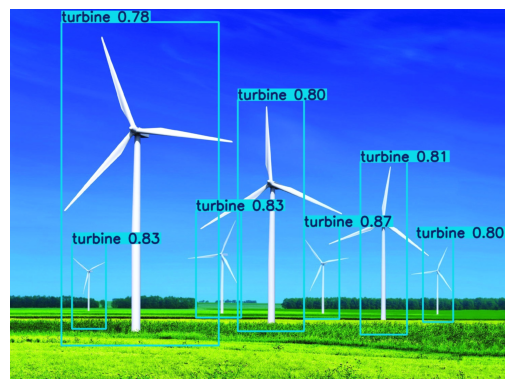

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "runs/detect/predict/turbine.jpg"
img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()


In [8]:
from google.colab import files
files.download("runs/detect/predict/turbine.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
for box in results[0].boxes:
    print(box.xyxy, box.conf, box.cls)


tensor([[865.5136, 640.0492, 969.8962, 911.3128]], device='cuda:0') tensor([0.8718], device='cuda:0') tensor([1.], device='cuda:0')
tensor([[182.3763, 690.6594, 282.1896, 940.0922]], device='cuda:0') tensor([0.8302], device='cuda:0') tensor([1.], device='cuda:0')
tensor([[547.8813, 593.0911, 680.1870, 907.8708]], device='cuda:0') tensor([0.8284], device='cuda:0') tensor([1.], device='cuda:0')
tensor([[1031.3674,  449.9860, 1168.7341,  957.4150]], device='cuda:0') tensor([0.8129], device='cuda:0') tensor([1.], device='cuda:0')
tensor([[1215.7832,  673.4280, 1304.4193,  920.4628]], device='cuda:0') tensor([0.8032], device='cuda:0') tensor([1.], device='cuda:0')
tensor([[670.1807, 267.9152, 865.7219, 947.5097]], device='cuda:0') tensor([0.7981], device='cuda:0') tensor([1.], device='cuda:0')
tensor([[151.9130,  38.1186, 614.7209, 989.5389]], device='cuda:0') tensor([0.7793], device='cuda:0') tensor([1.], device='cuda:0')
